<a href="https://colab.research.google.com/github/HarshalJagdale1747/CKD_detection_using_ML/blob/main/CKD_DETECTION_USING_ML(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [6]:
# Reading Dataset:
dataset = pd.read_csv("Kidney_data.csv")
# Top 5 records:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)

In [8]:
# Shape of dataset:
dataset.shape

(400, 25)

In [9]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [10]:
# Description:
dataset.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [13]:
dataset['rbc'].value_counts()

,count
rbc,
normal,201
abnormal,47


In [14]:
dataset['pc'].value_counts()

,count
pc,
normal,259
abnormal,76


In [15]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

/tmp/ipython-input-803850354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


In [16]:
dataset['pcc'].value_counts()

,count
pcc,
notpresent,354
present,42


In [17]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})

/tmp/ipython-input-3196457339.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})


In [18]:
dataset['ba'].value_counts()

,count
ba,
notpresent,374
present,22


In [19]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})

/tmp/ipython-input-2271382674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})


In [20]:
dataset['htn'].value_counts()

,count
htn,
no,251
yes,147


In [21]:
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

/tmp/ipython-input-2228437743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [22]:
dataset['dm'].value_counts()

,count
dm,
no,258
yes,134
\tno,3
\tyes,2
yes,1


In [23]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})



In [ ]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [24]:
dataset['cad'].value_counts()


,count
cad,
no,362
yes,34
\tno,2


In [25]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})

In [26]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


/tmp/ipython-input-1046343113.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [27]:
dataset['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [28]:
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

/tmp/ipython-input-374170606.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})


In [29]:
dataset['pe'].value_counts()

,count
pe,
no,323
yes,76


In [30]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

/tmp/ipython-input-166025595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [31]:
dataset['ane'].value_counts()

,count
ane,
no,339
yes,60


In [32]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

/tmp/ipython-input-1781658938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [33]:
dataset['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [34]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})

In [35]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [36]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,yes,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,no,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,normal,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,yes,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,normal,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,no,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,normal,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,no,0.0,1.0,0.0,0.0,1


In [37]:
# Datatypes:
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,float64
pcc,float64
ba,float64
bgr,float64


In [38]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [39]:
# Datatypes:
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,float64
pcc,float64
ba,float64
bgr,float64


In [40]:

# Description:
dataset.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

,0
rbc,152
rc,131
wc,106
pot,88
sod,87
pcv,71
pc,65
hemo,52
su,49
sg,47


In [42]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [43]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [45]:
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

TypeError: Cannot convert [nan nan 'normal' 'normal' 'normal' nan nan 'normal' 'normal' 'abnormal'
 nan 'abnormal' nan nan 'normal' nan nan nan nan nan 'abnormal' nan
 'normal' nan 'normal' nan nan 'normal' nan 'abnormal' nan nan nan
 'abnormal' 'normal' 'abnormal' 'normal' nan 'abnormal' 'normal' 'normal'
 nan nan 'abnormal' 'abnormal' nan nan nan 'normal' 'normal' nan nan nan
 nan 'normal' 'abnormal' 'normal' nan 'abnormal' nan nan 'normal' nan
 'abnormal' nan nan 'abnormal' 'normal' nan nan nan 'normal' nan
 'abnormal' 'abnormal' nan 'abnormal' nan nan nan nan nan nan 'normal'
 'normal' nan nan 'normal' nan nan 'normal' 'abnormal' 'normal' 'abnormal'
 nan nan nan nan nan nan 'abnormal' nan nan 'normal' nan nan nan 'normal'
 nan nan nan nan 'abnormal' nan 'abnormal' nan 'abnormal' nan nan nan nan
 nan nan nan nan nan nan 'normal' 'normal' nan 'normal' nan 'normal'
 'normal' 'normal' nan nan 'normal' nan nan nan 'normal' nan 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'normal' nan 'abnormal' 'normal' nan nan
 'abnormal' 'abnormal' 'abnormal' nan 'normal' 'normal' 'abnormal' nan
 'abnormal' nan nan nan nan nan 'abnormal' nan nan nan 'normal' nan
 'abnormal' nan nan 'normal' 'normal' 'abnormal' nan 'abnormal' 'normal'
 nan nan nan nan 'normal' 'normal' nan 'abnormal' 'abnormal' 'normal' nan
 'abnormal' nan 'abnormal' 'abnormal' nan 'normal' nan nan nan nan nan
 'normal' nan nan nan nan nan 'normal' nan 'normal' 'normal' nan 'normal'
 nan nan nan nan nan 'normal' nan nan nan 'abnormal' 'abnormal' nan nan
 'normal' 'normal' nan 'abnormal' 'normal' 'abnormal' nan nan nan nan
 'normal' nan nan 'normal' nan nan nan 'abnormal' 'normal' 'abnormal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' nan 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' nan
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' nan 'normal' 'normal' 'normal' 'normal' nan 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' nan 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 nan 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' nan nan 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' nan 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal'] to numeric

In [46]:
dataset.isnull().any().sum()

np.int64(19)

In [47]:
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

ValueError: could not convert string to float: 'normal'

<Figure size 2400x1400 with 0 Axes>

In [48]:
dataset.drop('pcv', axis=1, inplace=True)

In [49]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,7800.0,5.2,1.0,yes,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,6000.0,NaN,0.0,no,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,normal,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,7500.0,NaN,0.0,yes,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,normal,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,no,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,normal,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,7300.0,4.6,0.0,no,0.0,1.0,0.0,0.0,1


<Axes: ylabel='count'>

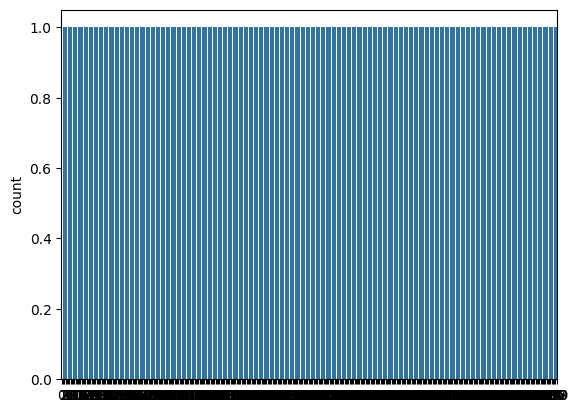

In [50]:
# Target feature:
sns.countplot(dataset['classification'])

In [51]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [52]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,7800.0,5.2,1.0,yes,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,6000.0,NaN,0.0,no,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,normal,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,7500.0,NaN,0.0,yes,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,normal,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,no,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,normal,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,7300.0,4.6,0.0,no,0.0,1.0,0.0,0.0


In [53]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: 'normal'

In [54]:
ranked_features.nlargest(8).index

NameError: name 'ranked_features' is not defined

In [55]:
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,yes,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,no,4.0,1.0,NaN,0.0
2,1.010,0.0,9.6,yes,2.0,0.0,NaN,0.0
3,1.005,1.0,11.2,no,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,no,2.0,1.0,4.6,0.0


In [56]:
X.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,no,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,no,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,no,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,no,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,no,0.0,1.0,6.1,0.0


In [57]:
y.head()

,classification
0,1
1,1
2,1
3,1
4,1


In [58]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [59]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


In [60]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [61]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [66]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('RF')

ValueError: could not convert string to float: 'yes'

In [67]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('ADB')

ValueError: Input contains NaN

In [68]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('GB')

ValueError: could not convert string to float: 'yes'

In [69]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression()
LogisticRegression=LogisticRegression.fit(X_train,y_train)

# Predictions:
y_pred = LogisticRegression.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('LR')

ValueError: could not convert string to float: 'yes'

In [70]:
from sklearn.naive_bayes import GaussianNB
GaussianNB=GaussianNB()
GaussianNB=GaussianNB.fit(X_train,y_train)

# Predictions:
y_pred = GaussianNB.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('NB')

ValueError: could not convert string to float: 'yes'

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn=knn.fit(X_train, y_train)

# Predictions:
y_pred = knn.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('KNN')

ValueError: could not convert string to float: 'yes'

In [72]:
from sklearn.svm import SVC
svm= SVC(kernel = 'linear', random_state = 0)
svm=svm.fit(X_train, y_train)

# Predictions:
y_pred = svm.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('SVM')

ValueError: could not convert string to float: 'yes'

In [73]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm=ksvm.fit(X_train, y_train)

# Predictions:
y_pred = ksvm.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('kSVM')

ValueError: could not convert string to float: 'yes'

In [74]:
from sklearn import tree
tree=tree.DecisionTreeClassifier()
dtree=tree.fit(X_train,y_train)

# Predictions:
y_pred = dtree.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('DB')

ValueError: could not convert string to float: 'yes'

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

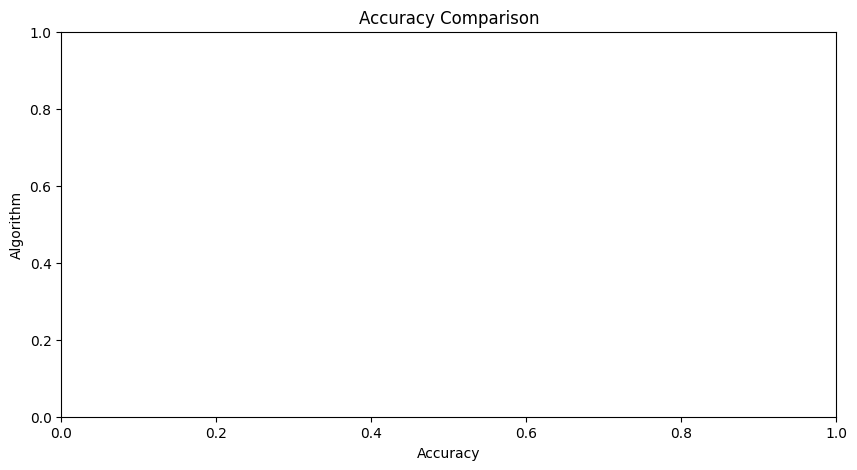

In [75]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [76]:
import pickle
with open("Kidney_model.pkl","wb") as file:
    pickle.dump(dtree,file)

NameError: name 'dtree' is not defined

In [77]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=18)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 20,25]
min_samples_leaf = [1, 2, 5, 10,12,15]
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [78]:
from  sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
tuned_model = RandomizedSearchCV(rf, params,
                            cv=5, n_iter=20, random_state=43, n_jobs=-1)

In [79]:
tuned_model.fit(X_train, y_train)

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'yes'


In [80]:
#Printing Best Parameter during tunning
print(tuned_model.best_estimator_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [81]:
RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=435,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF = RF.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'min_impurity_split'

In [82]:
import pickle
with open("tunned_kidney_Cancer_model.pkl","wb") as file:
    pickle.dump(RF,file)


NameError: name 'RF' is not defined